# Exploring linear regression - confidence intervals and prediction intervals

In [9]:
import numpy as np
seed = 111
np.random.seed(seed)
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Create toy data and true model parameters to be estimated

In [11]:
#Create an actual linear model
x = np.arange(-5, 5, 0.1)

#True underlying parameters
b0 = 2
b1 = 0.5
sig = 0.5

y_mean =  [b0 + b1*ii for ii in x]
y = [jj + sig*np.random.randn() for jj in y_mean]

Text(0,0.5,'Response Variable')

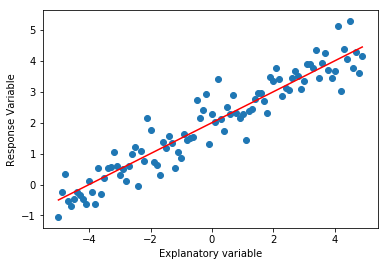

In [12]:
plt.scatter(x, y)
plt.plot(x, y_mean, 'r-')
plt.xlabel('Explanatory variable')
plt.ylabel('Response Variable')

Draw random samples of data and use them to fit a simple linear regression. 

In [13]:
inference_fraction = 0.4 
num_repeats = 1000

In [14]:
# plt.scatter(x_infer, y_infer)
# plt.scatter(x_test, y_test)
# plt.xlabel('Explanatory variable')
# plt.ylabel('Response Variable')
# plt.legend(['inference', 'testing'])

In [15]:
b0_estimates = []
b1_estimates = []
sig_estimates = []

#Check the sampling distributions for the model parameters
for ii in range(num_repeats):

    x_infer, x_test, y_infer, y_test = train_test_split(x, y, test_size=1-inference_fraction)

    num_points = len(x_infer)
    x_infer = np.array(x_infer).reshape(num_points, 1)
    y_infer = np.array(y_infer).reshape(num_points, 1)

    model = lr()
    model.fit(x_infer, y_infer)
    mse = mean_squared_error(y_infer, model.predict(x_infer))

    b0_estimates.extend(model.intercept_)
    b1_estimates.extend(model.coef_[0])
    sig_estimates.extend([np.power(mse, 0.5)])

Text(0.5,1,'Distribution of noise std estimates: 1000 repeats')

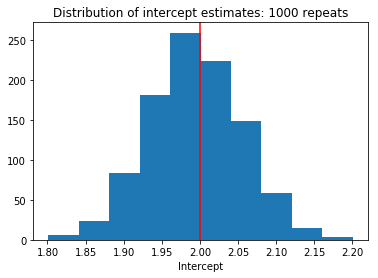

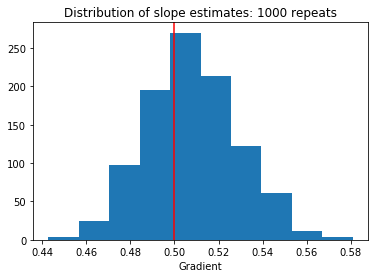

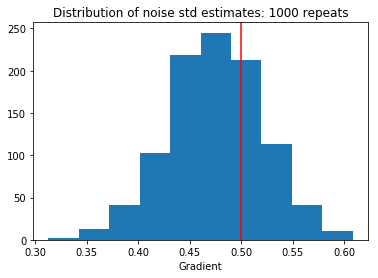

In [16]:
plt.figure()
plt.hist(b0_estimates)
plt.axvline(b0, c='r')
plt.xlabel('Intercept')
plt.title('Distribution of intercept estimates: {} repeats'.format(num_repeats))

plt.figure()
plt.hist(b1_estimates)
plt.axvline(b1, c='r')
plt.xlabel('Gradient')
plt.title('Distribution of slope estimates: {} repeats'.format(num_repeats))

plt.figure()
plt.hist(sig_estimates)
plt.axvline(sig, c='r')
plt.xlabel('Gradient')
plt.title('Distribution of noise std estimates: {} repeats'.format(num_repeats))

Pick a diagnostic value to examine. Then, esimate the confidence and prediction intervals for a given data point.

The confidence interval is a range of values within which we would expect the mean response a + b*x to lie 95% of the time, if we were to fit a large number of models to samples of data from the overall population.

The prediction interval is concerned with establishing a range for the ACTUAL value of the response variable Y = a + b*x + eps (where eps ~ N(0, sig^2)), at a specific value of x, in which the value can be expected to lie if we repeat the sampling and modelling process multiple times. The actual response will differ due to systematic errors of measurement, sensor noise etc. 

Prediction range: 1.6404078257444639
Confidence interval: 0.19847473789801473

Prediction range: 1.538731216112369
Confidence interval: 0.22285143015045294

Prediction range: 1.5688720487696992
Confidence interval: 0.2585217497903991

Prediction range: 1.5708258068142098
Confidence interval: 0.3132414990382597

Prediction range: 1.5909034675621805
Confidence interval: 0.36731756120273795

Prediction range: 1.6825063550753598
Confidence interval: 0.42872541973122047

Prediction range: 1.6505086863683687
Confidence interval: 0.494883221895952

Prediction range: 1.6511476962856833
Confidence interval: 0.5614760408812964

Prediction range: 1.7179322014353362
Confidence interval: 0.6258624422224006

Prediction range: 1.6309691349354303
Confidence interval: 0.6893724844683193

Prediction range: 1.7988843824308534
Confidence interval: 0.7560717437065758

Prediction range: 1.775526793419016
Confidence interval: 0.8228529906936402

Prediction range: 1.7308611300107168
Confidence interval: 0.889

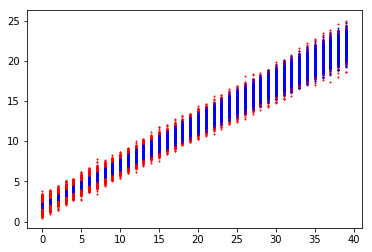

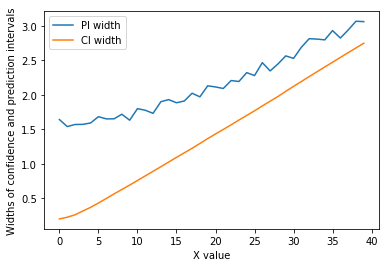

In [20]:
pi_ranges = []
ci_ranges = []

for diagnostic in range(40):
# diagnostic = np.random.choice(x)

    ci_check = [ii + jj*diagnostic for (ii, jj) in zip(b0_estimates, b1_estimates)]
    pi_check = [ii + jj*np.random.randn() for (ii, jj) in zip(ci_check, sig_estimates)]

    ci_point = [diagnostic for ii in range(num_repeats)]
    pi_point = [diagnostic for ii in range(num_repeats)]

    plt.scatter(pi_point, pi_check, s=1, c='r')  
    plt.scatter(ci_point, ci_check, s=1, c='b')

    pi_range = np.percentile(pi_check, 95) - np.percentile(pi_check, 5)
    ci_range = np.percentile(ci_check, 95) - np.percentile(ci_check, 5)

    pi_ranges.append([pi_range])
    ci_ranges.append([ci_range])
    
    print('Prediction range: {}'.format(pi_range))
    print('Confidence interval: {}'.format(ci_range))
    print()

plt.figure()
plt.plot(pi_ranges)
plt.plot(ci_ranges)
plt.xlabel('X value')
plt.ylabel('Widths of confidence and prediction intervals')
plt.legend(['PI width', 'CI width'])
plt.show()